In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("C:/Users/User/Downloads/counterfeit_products_renamed.csv")

In [4]:
df.shape

(5000, 27)

In [5]:
df.head(10)

,item_ref,vendor_code,product_type,manufacturer,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,...,dispatch_loc,page_hits,sales_vol,saved_items,trust_seals,guarantee_term,wholesale_avail,payment_anomaly,geo_inconsistency,fraud_indicator
0,dcb12716,seller_5426,Electronics,DigitalPro,218.54,4.9,5291,7,220,7,...,JP,3454,99,23,2,21,True,False,True,False
1,d1f8b777,seller_4385,Luxury Goods,TechCrop,NaN,3.2,29,2,179,41,...,CA,4127,252,88,0,9,False,False,False,True
2,9989f13a,seller_2528,Fashion,FashionForward,18.87,3.9,14,2,100,25,...,CN,3212,306,6,4,8,True,True,False,True
3,4e008120,seller_8099,Electronics,CircuitMaster,79.27,4.9,8533,4,976,10,...,CN,1488,7,46,2,13,False,False,False,False
4,933b65ba,seller_7873,Luxury Goods,PremiumCraft,225.98,3.8,7655,4,589,6,...,DE,171,9,5,3,13,False,False,False,False
5,52a410fa,seller_7863,Pharmaceuticals,BioMed Solutions,NaN,4.0,7729,9,451,9,...,NaN,347,23,12,0,14,False,False,False,False
6,59e1a27b,seller_6618,Pharmaceuticals,BeautyLu×,NaN,1.0,8,2,178,25,...,GB,401,34,2,0,4,False,False,False,True
7,b8fa970d,seller_3454,Electronics,NaturalGl0w,186.00,3.0,27,1,121,25,...,FR,3655,215,36,2,11,False,False,False,True
8,3c4f5456,seller_1502,Fashion,TrendSetter,336.90,4.8,5156,5,812,3,...,DE,4503,358,26,0,14,False,False,False,False
9,f4068089,seller_7019,Fashion,ClassicWear,242.39,3.5,1584,5,774,7,...,IN,1767,150,14,2,3,False,False,NaN,False


In [6]:
df.columns

Index(['item_ref', 'vendor_code', 'product_type', 'manufacturer', 'cost_usd',
       'vendor_score', 'feedback_count', 'image_qty', 'desc_chars',
       'delivery_period', 'typo_count', 'site_age', 'contact_valid',
       'return_clarity', 'payment_options', 'post_timestamp', 'vendor_nation',
       'dispatch_loc', 'page_hits', 'sales_vol', 'saved_items', 'trust_seals',
       'guarantee_term', 'wholesale_avail', 'payment_anomaly',
       'geo_inconsistency', 'fraud_indicator'],
      dtype='object')

In [7]:
df.dtypes

item_ref              object
vendor_code           object
product_type          object
manufacturer          object
cost_usd             float64
vendor_score         float64
feedback_count         int64
image_qty              int64
desc_chars             int64
delivery_period        int64
typo_count             int64
site_age             float64
contact_valid           bool
return_clarity          bool
payment_options        int64
post_timestamp        object
vendor_nation         object
dispatch_loc          object
page_hits              int64
sales_vol              int64
saved_items            int64
trust_seals            int64
guarantee_term         int64
wholesale_avail         bool
payment_anomaly         bool
geo_inconsistency     object
fraud_indicator         bool
dtype: object

In [8]:
df.nunique()

item_ref             5000
vendor_code          3828
product_type            6
manufacturer           36
cost_usd             3509
vendor_score           41
feedback_count       3059
image_qty               9
desc_chars            945
delivery_period        44
typo_count              5
site_age             2551
contact_valid           2
return_clarity          2
payment_options         5
post_timestamp       2227
vendor_nation          10
dispatch_loc           10
page_hits            3135
sales_vol             451
saved_items           100
trust_seals             5
guarantee_term         24
wholesale_avail         2
payment_anomaly         2
geo_inconsistency       2
fraud_indicator         2
dtype: int64

In [9]:
df.isna().sum()

item_ref                0
vendor_code             0
product_type            0
manufacturer            0
cost_usd             1348
vendor_score            0
feedback_count          0
image_qty               0
desc_chars              0
delivery_period         0
typo_count              0
site_age                0
contact_valid           0
return_clarity          0
payment_options         0
post_timestamp          0
vendor_nation           0
dispatch_loc          747
page_hits               0
sales_vol               0
saved_items             0
trust_seals             0
guarantee_term          0
wholesale_avail         0
payment_anomaly         0
geo_inconsistency    1249
fraud_indicator         0
dtype: int64

In [10]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(exclude=['number']).columns.tolist()
print(f"Numerical columns ({len(num_cols)}): {num_cols}")
print(f"Categorical columns ({len(cat_cols)}): {cat_cols}")


Numerical columns (14): ['cost_usd', 'vendor_score', 'feedback_count', 'image_qty', 'desc_chars', 'delivery_period', 'typo_count', 'site_age', 'payment_options', 'page_hits', 'sales_vol', 'saved_items', 'trust_seals', 'guarantee_term']
Categorical columns (13): ['item_ref', 'vendor_code', 'product_type', 'manufacturer', 'contact_valid', 'return_clarity', 'post_timestamp', 'vendor_nation', 'dispatch_loc', 'wholesale_avail', 'payment_anomaly', 'geo_inconsistency', 'fraud_indicator']


In [11]:
df[num_cols].describe()

,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,typo_count,site_age,payment_options,page_hits,sales_vol,saved_items,trust_seals,guarantee_term
count,3652.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,224.710643,3.732980,3529.809200,4.686200,463.56400,13.4622,1.093400,1467.886499,3.254000,2469.286600,123.050800,39.169600,2.026400,11.562000
std,136.900310,0.995313,3281.418979,2.651629,294.29469,11.5496,1.160752,1174.386070,1.357296,1424.525316,107.889725,28.945971,1.405453,6.882037
min,10.120000,1.000000,0.000000,1.000000,50.00000,1.0000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,109.825000,3.500000,85.000000,2.000000,179.00000,5.0000,0.000000,308.000000,2.000000,1245.750000,34.000000,13.000000,1.000000,6.000000
50%,191.815000,4.000000,2922.500000,5.000000,433.50000,10.0000,1.000000,1320.500000,3.000000,2433.000000,93.000000,34.000000,2.000000,12.000000
75%,336.615000,4.500000,6401.500000,7.000000,725.25000,18.0000,1.000000,2471.000000,4.000000,3701.500000,185.000000,62.000000,3.000000,18.000000
max,499.840000,5.000000,9996.000000,9.000000,999.00000,44.0000,4.000000,9995.291780,5.000000,4996.000000,491.000000,99.000000,4.000000,23.000000


In [12]:
for col in cat_cols:
    print(f"\nTop values for '{col}':")
    display(df[col].value_counts(dropna=False).head(10))


Top values for 'item_ref':


item_ref
dcb12716    1
d1f8b777    1
9989f13a    1
4e008120    1
933b65ba    1
52a410fa    1
59e1a27b    1
b8fa970d    1
3c4f5456    1
f4068089    1
Name: count, dtype: int64


Top values for 'vendor_code':


vendor_code
seller_5587    5
seller_2286    5
seller_2688    4
seller_4536    4
seller_5747    4
seller_2660    4
seller_4080    4
seller_2359    4
seller_2056    4
seller_6938    4
Name: count, dtype: int64


Top values for 'product_type':


product_type
Luxury Goods        870
Pharmaceuticals     842
Automotive Parts    842
Electronics         841
Cosmetics           825
Fashion             780
Name: count, dtype: int64


Top values for 'manufacturer':


manufacturer
LuxuryBrand        200
HealthCare Plus    181
AutoParts Pro      180
CircuitMaster      176
ExclusiveItems     176
PureSkin           174
CarTech            171
PremiumCraft       170
ElectroMax         169
MediPharm          168
Name: count, dtype: int64


Top values for 'contact_valid':


contact_valid
True     3618
False    1382
Name: count, dtype: int64


Top values for 'return_clarity':


return_clarity
True     3465
False    1535
Name: count, dtype: int64


Top values for 'post_timestamp':


post_timestamp
2023-07-07    13
2024-10-22    12
2025-06-28    12
2024-08-04    11
2025-04-02    11
2024-08-13    11
2025-06-05    10
2024-05-25    10
2025-01-14    10
2024-08-10    10
Name: count, dtype: int64


Top values for 'vendor_nation':


vendor_nation
FR    524
KR    520
US    519
CA    511
AU    504
CN    499
IN    499
DE    495
JP    471
GB    458
Name: count, dtype: int64


Top values for 'dispatch_loc':


dispatch_loc
NaN    747
KR     449
CA     447
CN     438
US     427
DE     424
AU     421
GB     420
IN     415
JP     409
Name: count, dtype: int64


Top values for 'wholesale_avail':


wholesale_avail
False    3998
True     1002
Name: count, dtype: int64


Top values for 'payment_anomaly':


payment_anomaly
False    4489
True      511
Name: count, dtype: int64


Top values for 'geo_inconsistency':


geo_inconsistency
False    3200
NaN      1249
True      551
Name: count, dtype: int64


Top values for 'fraud_indicator':


fraud_indicator
False    3530
True     1470
Name: count, dtype: int64

In [13]:
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df) * 100).round(2)
missing_df = pd.DataFrame({"missing_count": missing_count,"missing_percent": missing_percent}).sort_values(by="missing_count", ascending=False)
display(missing_df[missing_df.missing_count > 0])

,missing_count,missing_percent
cost_usd,1348,26.96
geo_inconsistency,1249,24.98
dispatch_loc,747,14.94


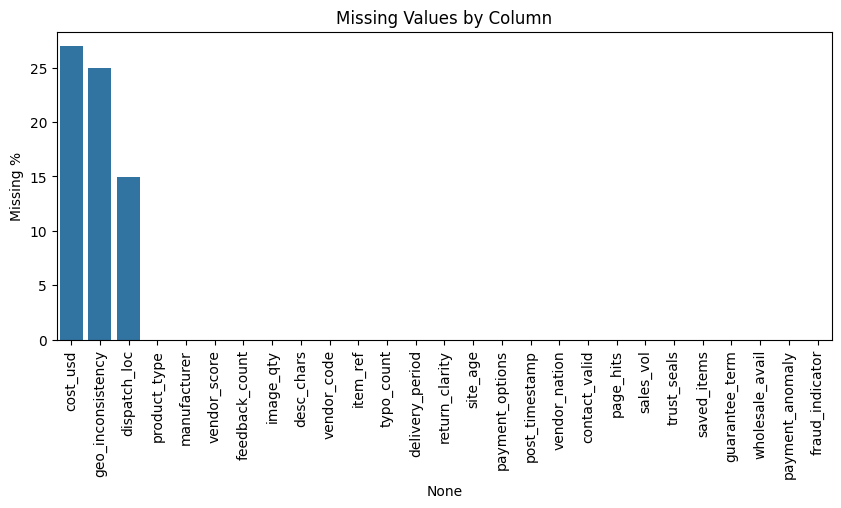

In [14]:
plt.figure(figsize=(10,4))
sns.barplot(x=missing_df.index, y="missing_percent", data=missing_df)
plt.xticks(rotation=90)
plt.ylabel("Missing %")
plt.title("Missing Values by Column")
plt.show()

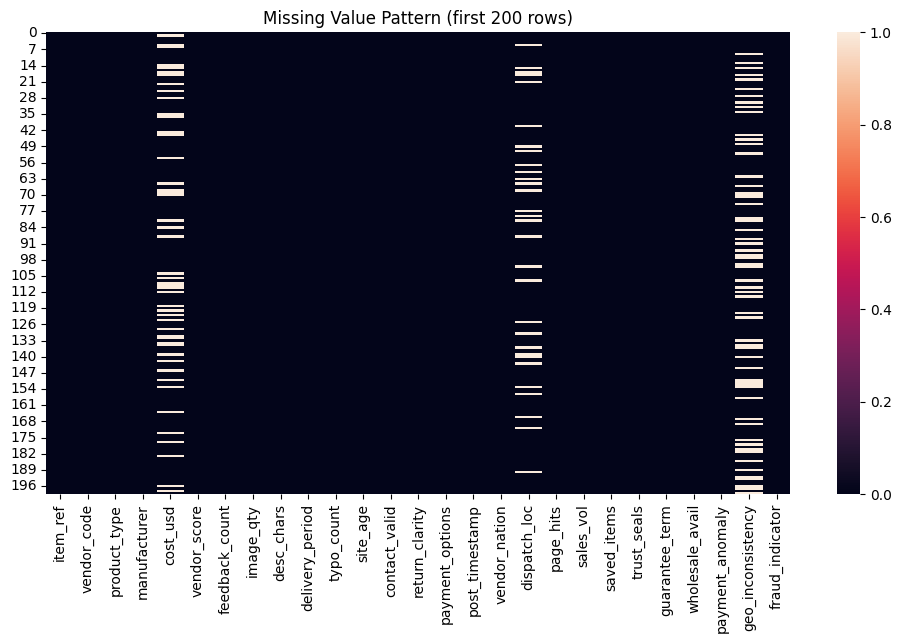

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.head(200).isna())
plt.title("Missing Value Pattern (first 200 rows)")
plt.show()

In [17]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")
for col in cat_cols:
    types = df[col].dropna().map(type).unique()
    if len(types) > 1:
        print(f"Column '{col}' has mixed types: {types}")

Number of duplicate rows: 0


In [18]:
#Outlier Detection:
outliers = []
for col in num_cols:
    series = df[col].dropna()
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    iqr_outliers = ((series < lower) | (series > upper)).sum()
    outliers.append((col, iqr_outliers))
outliers_df = pd.DataFrame(outliers, columns=["column", "iqr_outliers"])
display(outliers_df.sort_values("iqr_outliers", ascending=False))

,column,iqr_outliers
6,typo_count,726
1,vendor_score,470
5,delivery_period,322
10,sales_vol,85
7,site_age,10
0,cost_usd,0
4,desc_chars,0
3,image_qty,0
2,feedback_count,0
8,payment_options,0


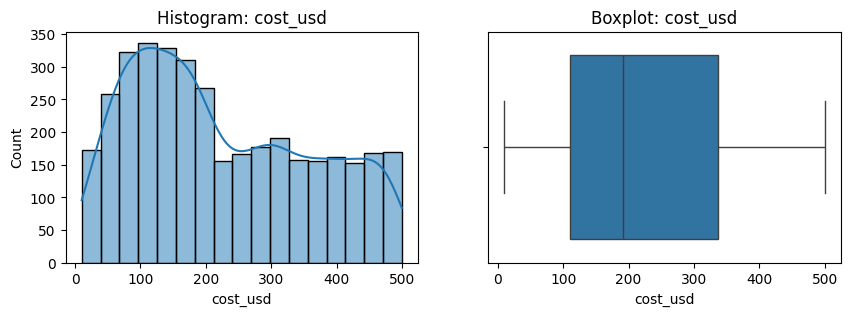

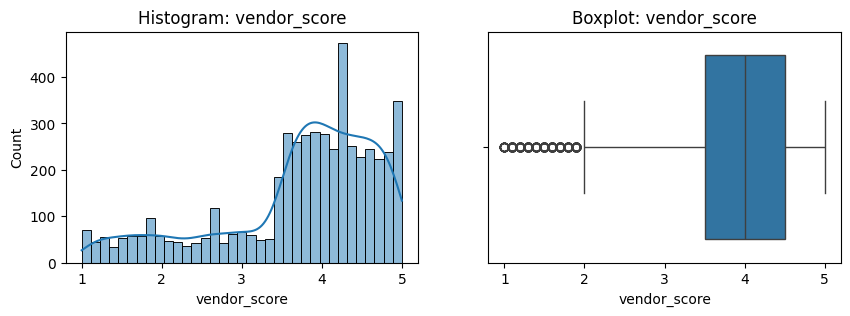

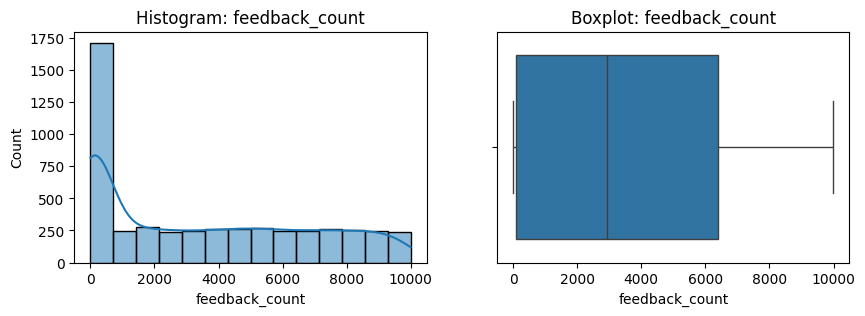

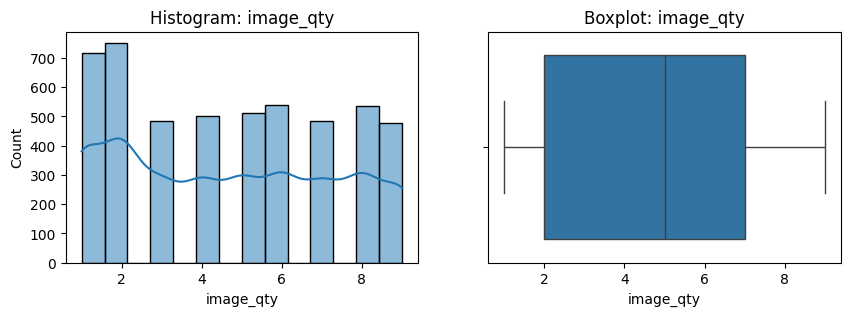

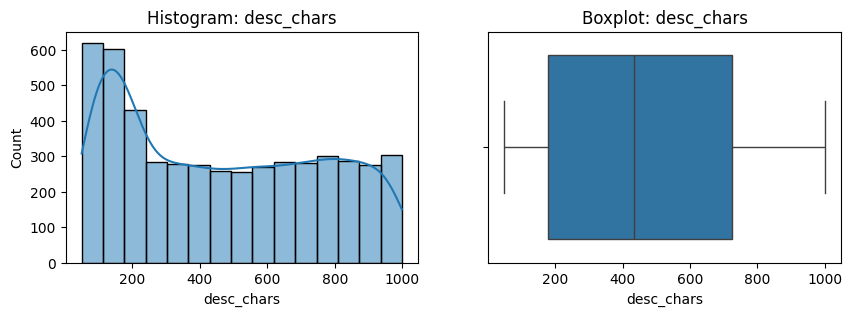

In [19]:
for col in num_cols[:5]: 
    fig, axes = plt.subplots(1,2, figsize=(10,3))
    sns.histplot(df[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram: {col}")
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot: {col}")
    plt.show()

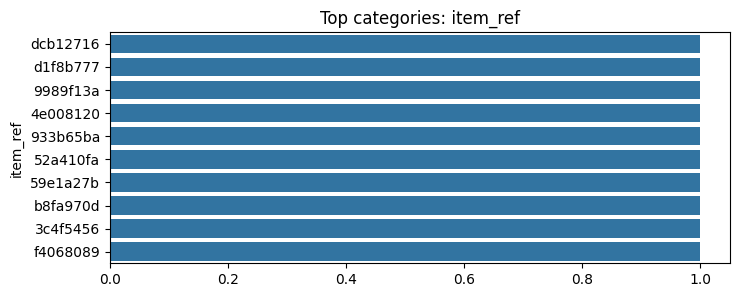

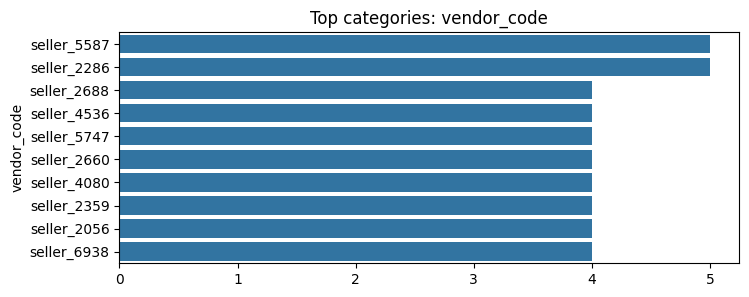

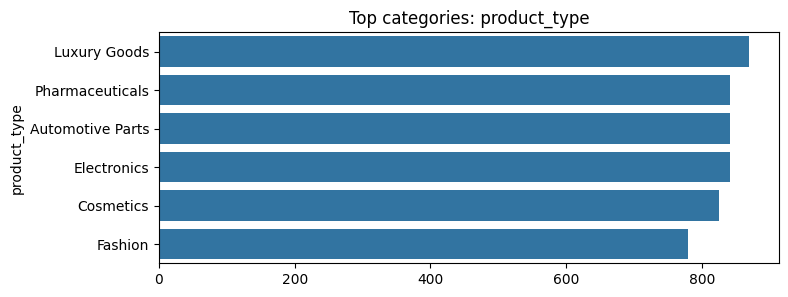

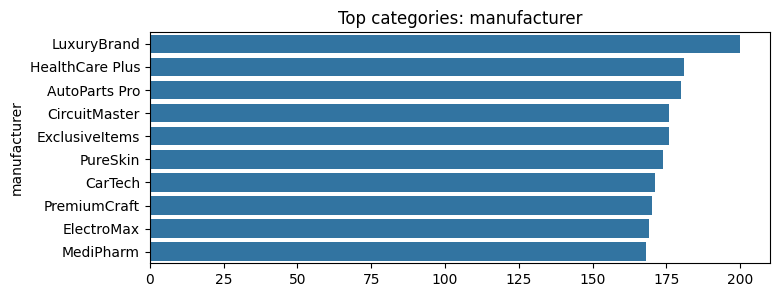

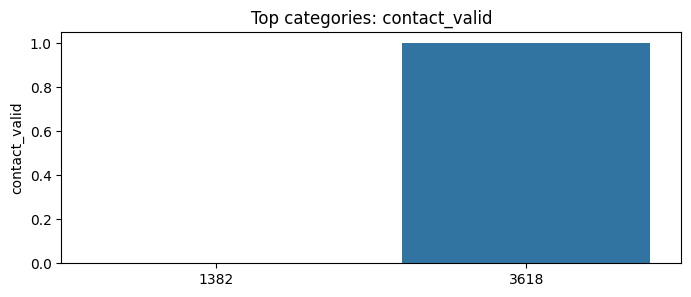

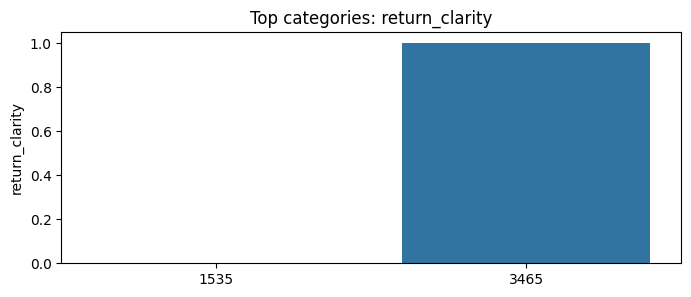

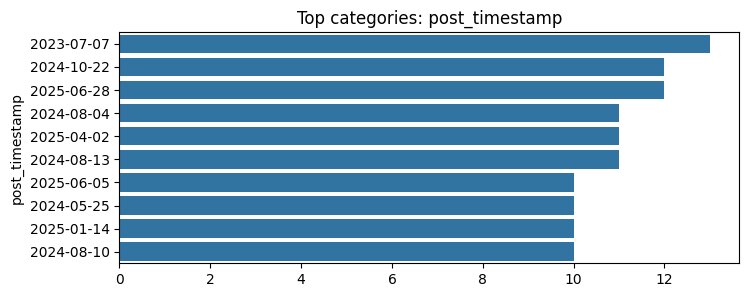

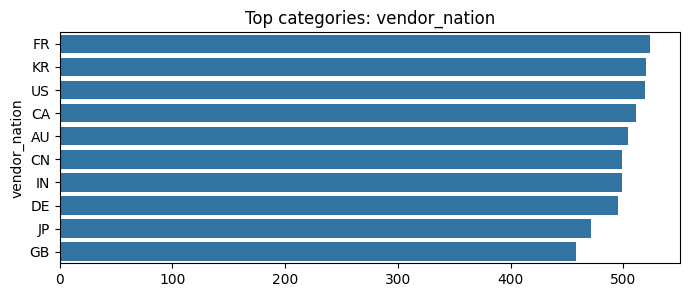

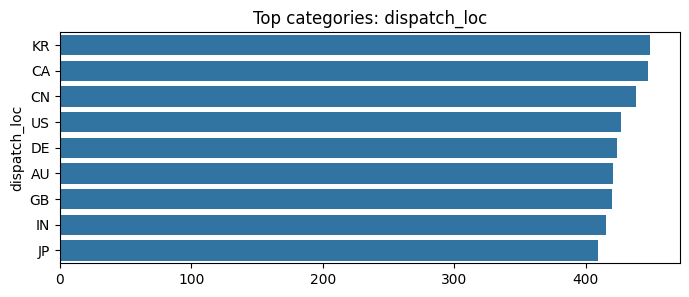

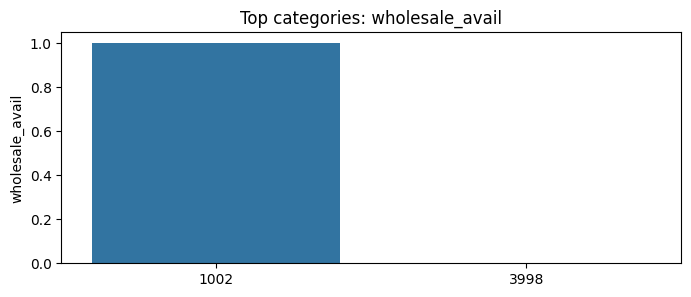

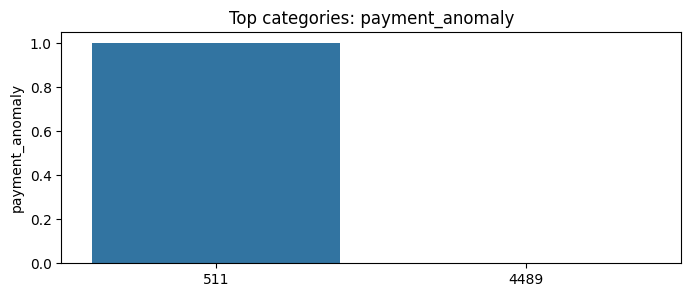

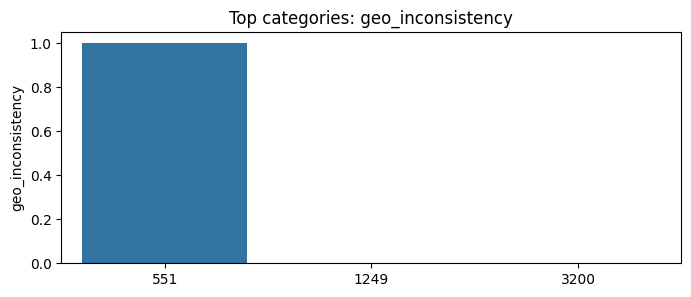

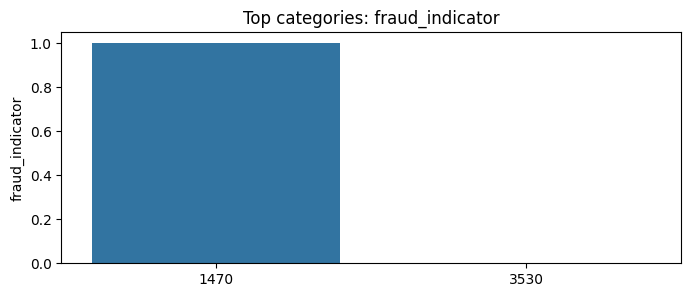

In [20]:
for col in cat_cols:
    vc = df[col].value_counts(dropna=False).head(10)
    plt.figure(figsize=(8,3))
    sns.barplot(x=vc.values, y=vc.index)
    plt.title(f"Top categories: {col}")
    plt.show()

Target distribution:


fraud_indicator
False    3530
True     1470
Name: count, dtype: int64

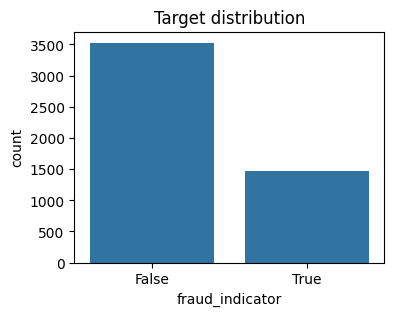

In [21]:
target = 'fraud_indicator'
print("Target distribution:")
display(df[target].value_counts())
plt.figure(figsize=(4,3))
sns.countplot(x=target, data=df)
plt.title("Target distribution")
plt.show()

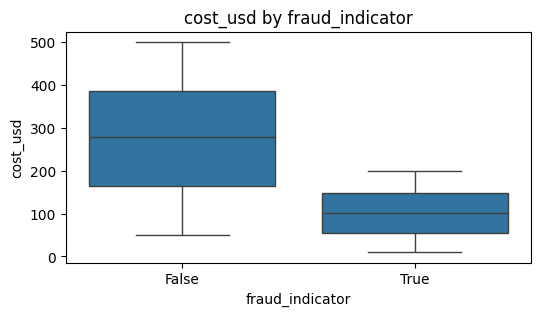

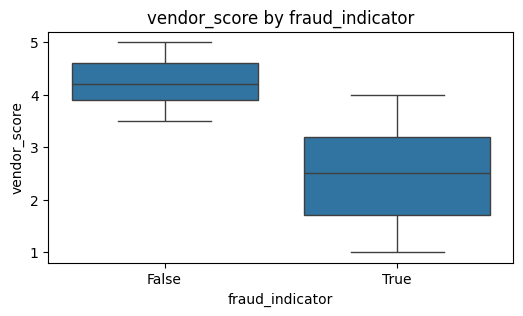

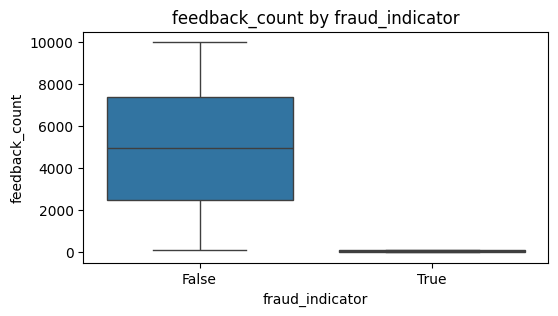

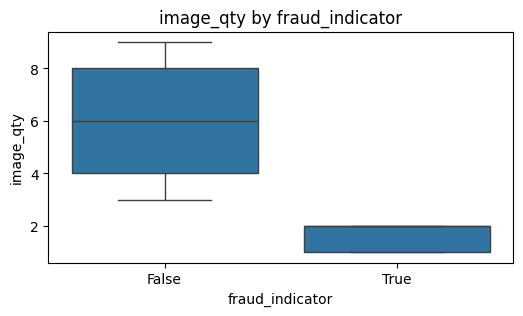

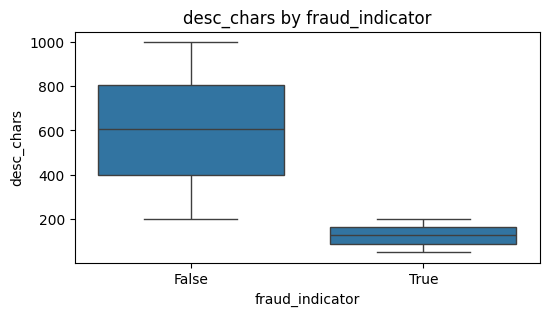

In [22]:
for col in num_cols[:5]:  
    plt.figure(figsize=(6,3))
    sns.boxplot(x=target, y=col, data=df)
    plt.title(f"{col} by {target}")
    plt.show()


Cross-tab for item_ref:


fraud_indicator,False,True
item_ref,,
0021ae58,0,1
002677c0,1,0
002cf396,1,0
003756e8,0,1
003e0a55,1,0
004e88fe,1,0
005ba8d8,1,0
0070a30c,0,1
0079947a,1,0


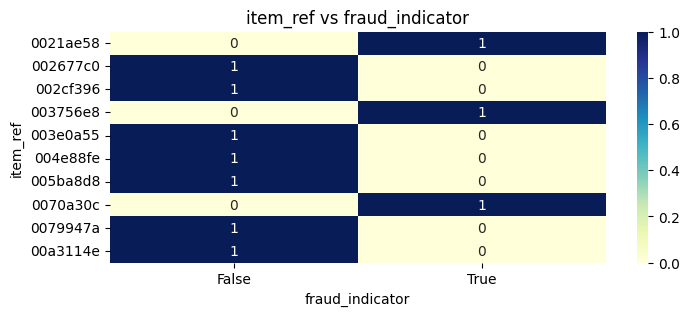


Cross-tab for vendor_code:


fraud_indicator,False,True
vendor_code,,
seller_1000,1,0
seller_1002,0,2
seller_1007,1,0
seller_1008,0,1
seller_1010,2,0
seller_1011,1,0
seller_1016,1,0
seller_1018,1,0
seller_1019,1,0


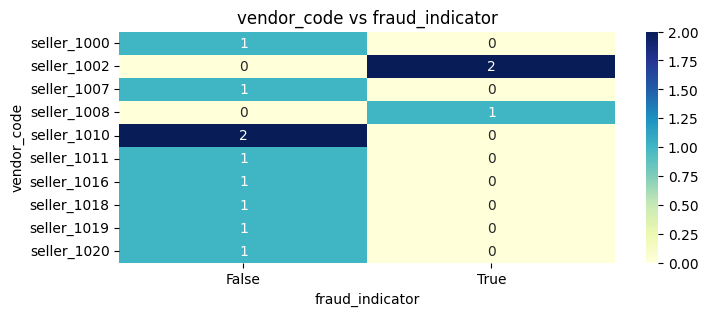


Cross-tab for product_type:


fraud_indicator,False,True
product_type,,
Automotive Parts,580,262
Cosmetics,584,241
Electronics,573,268
Fashion,556,224
Luxury Goods,632,238
Pharmaceuticals,605,237


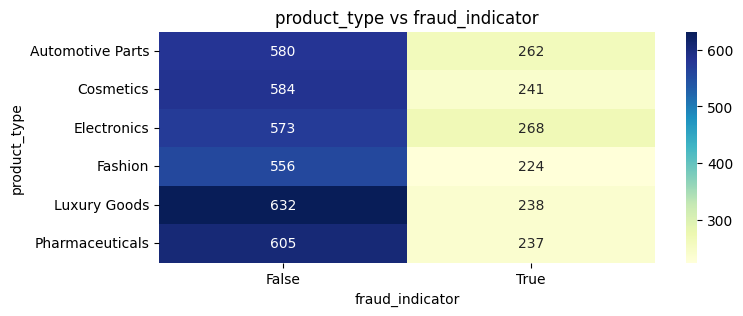


Cross-tab for manufacturer:


fraud_indicator,False,True
manufacturer,,
AutoParts Pro,163,17
BeautyLux,153,14
BeautyLu×,0,82
BioMed Solutions,149,12
CarTech,152,19
CircuitMaster,158,18
CircuitMastr,0,96
ClassicWear,151,17
ClassicWear.,0,94


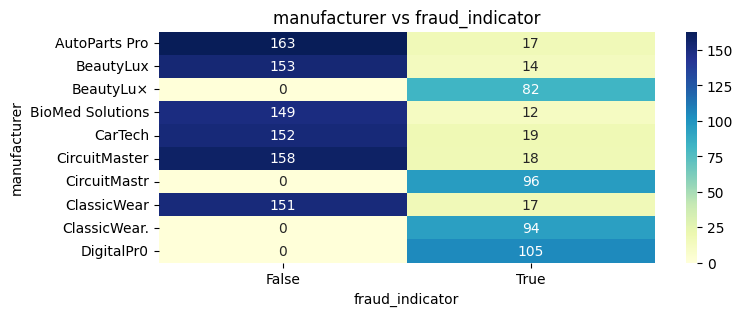


Cross-tab for contact_valid:


fraud_indicator,False,True
contact_valid,,
False,371,1011
True,3159,459


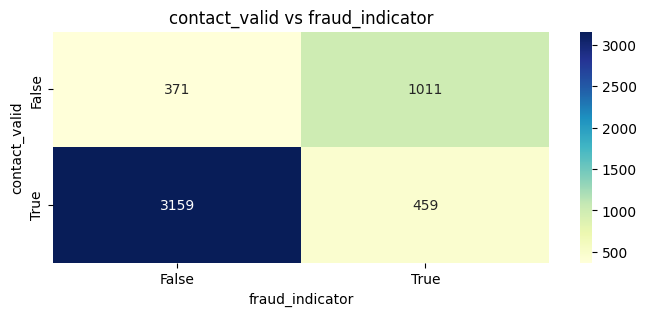


Cross-tab for return_clarity:


fraud_indicator,False,True
return_clarity,,
False,669,866
True,2861,604


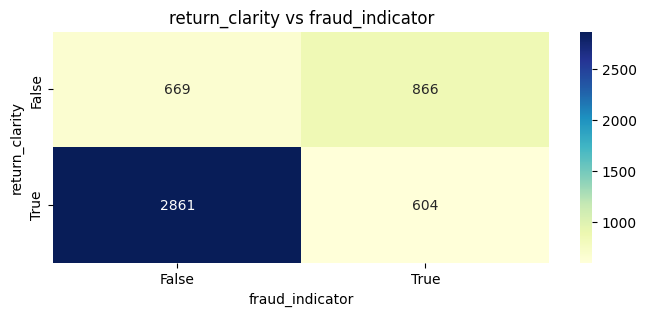


Cross-tab for post_timestamp:


fraud_indicator,False,True
post_timestamp,,
00-05-5737,0,1
00-16-2475,1,0
00-16-9078,0,1
00-2223-30,0,1
00-23-2088,1,0
00-25-1460,1,0
00-30-5301,1,0
00-36-6899,1,0
00-5233-02,1,0


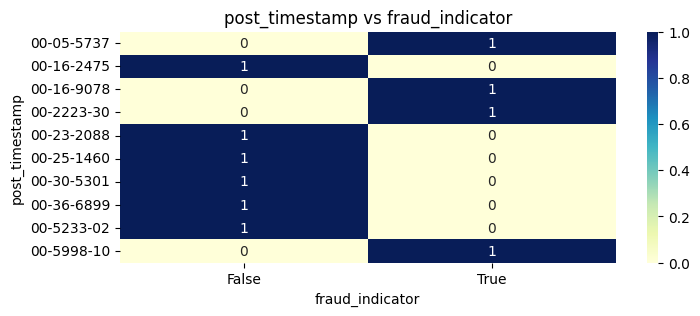


Cross-tab for vendor_nation:


fraud_indicator,False,True
vendor_nation,,
AU,361,143
CA,378,133
CN,347,152
DE,343,152
FR,370,154
GB,325,133
IN,360,139
JP,326,145
KR,358,162


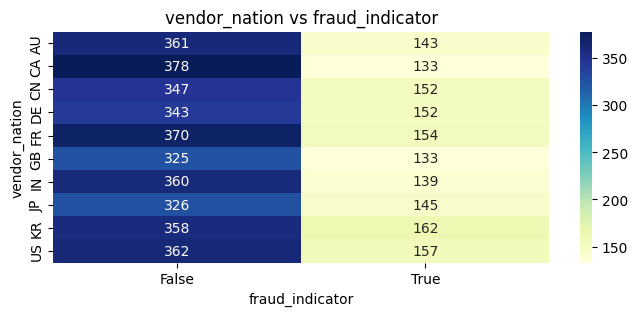


Cross-tab for dispatch_loc:


fraud_indicator,False,True
dispatch_loc,,
AU,281,140
CA,313,134
CN,313,125
DE,305,119
FR,274,129
GB,301,119
IN,300,115
JP,289,120
KR,326,123


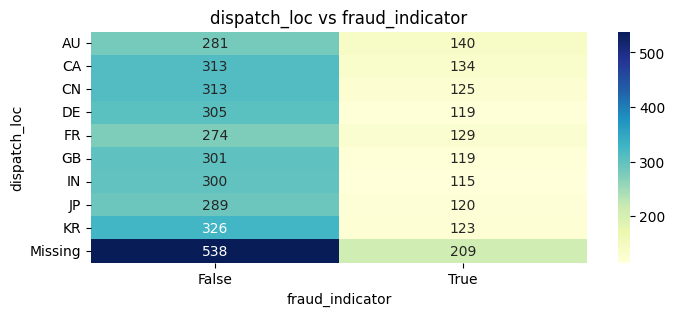


Cross-tab for wholesale_avail:


fraud_indicator,False,True
wholesale_avail,,
False,2848,1150
True,682,320


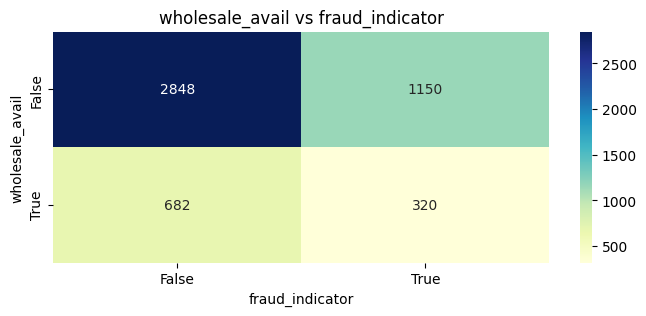


Cross-tab for payment_anomaly:


fraud_indicator,False,True
payment_anomaly,,
False,3174,1315
True,356,155


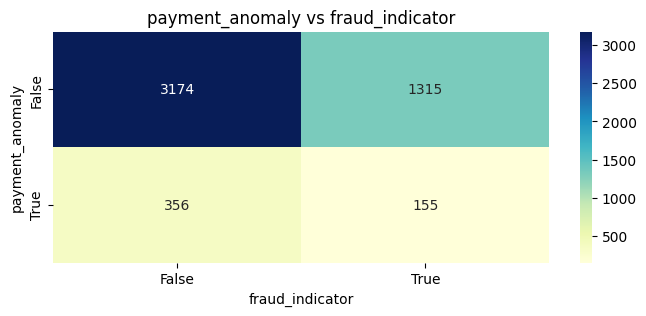


Cross-tab for geo_inconsistency:


fraud_indicator,False,True
geo_inconsistency,,
False,2246,954
True,373,178
Missing,911,338


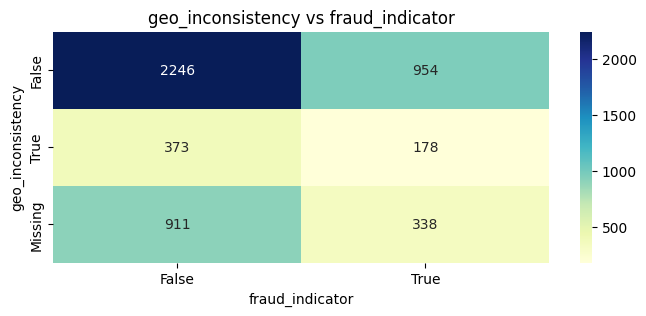


Cross-tab for fraud_indicator:


fraud_indicator,False,True
fraud_indicator,,
False,3530,0
True,0,1470


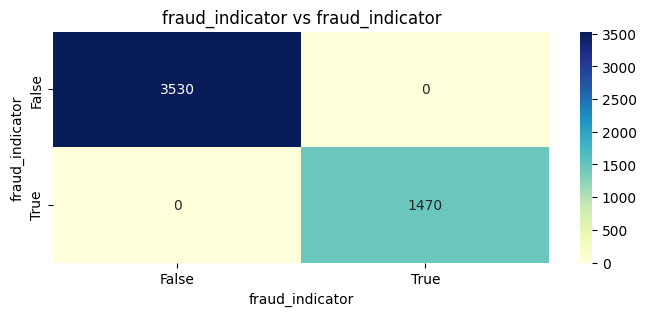

In [23]:
for col in cat_cols:
    ct = pd.crosstab(df[col].fillna('Missing'), df[target])
    print(f"\nCross-tab for {col}:")
    display(ct.head(10))
    plt.figure(figsize=(8,3))
    sns.heatmap(ct.head(10), annot=True, fmt="d", cmap="YlGnBu")
    plt.title(f"{col} vs {target}")
    plt.show()

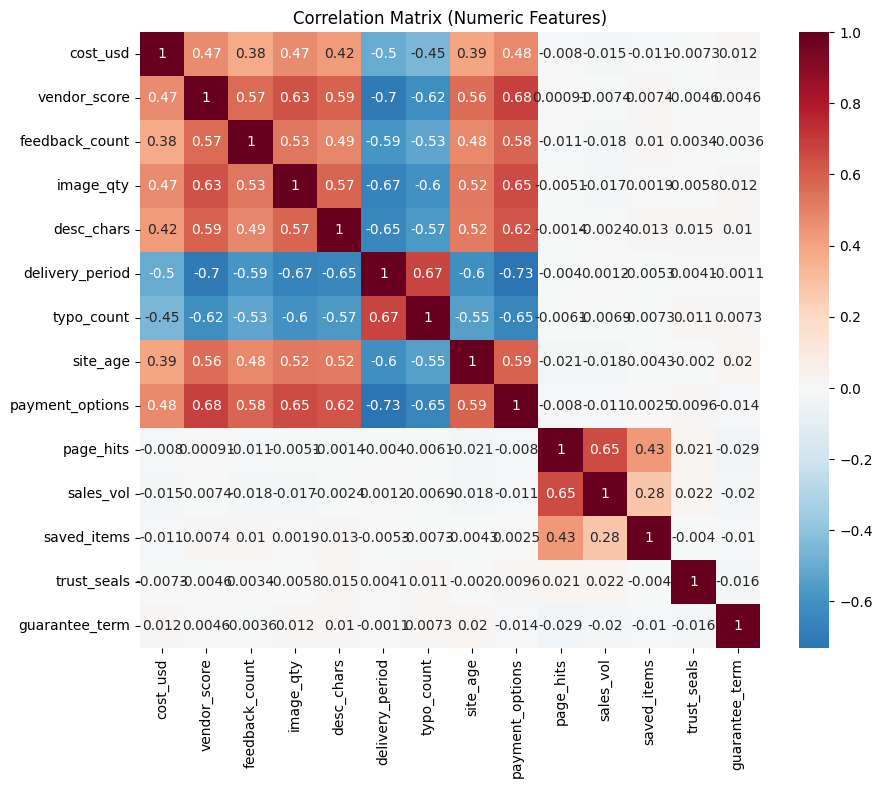

In [24]:
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="RdBu_r", center=0)
plt.title("Correlation Matrix (Numeric Features)")
plt.show()